In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
employment = ['1099', 'w2']

In [3]:
options = { 
    0: {'employment': '1099', 'Base': 166400, 'add_comp': 0, 'vacation': -5000, 'fed_tax': -25000, 'st_tax': 0, 'ssmed_tax': -10000, 'hlth_ins': 0},
    1: {'employment': 'w2', 'Base': 115000,'add_comp': 4000, 'vacation': 0, 'fed_tax': -10000,'st_tax': 0,'ssmed_tax': -5000, 'hlth_ins': 0},
}

In [4]:
yearly_hours = 2080
hourly_rate = 80
salary = 115000
hlth_ins_emp = .5
retire_match = .04
hlth_ins_mth = 1400
hlth_ins_yr = hlth_ins_mth * 12

In [5]:
def annual_earnings(employment, salary, yearly_hours, hourly_rate):
    if employment == 'w2':
        base_salary = salary
    elif employment == '1099':
        base_salary = yearly_hours * hourly_rate
    else:
        base_salary = None
    
    return base_salary

In [6]:
for employment in ['1099', 'w2']:
    option = 0
    base_salary = annual_earnings(employment, salary, yearly_hours, hourly_rate)
    options[option]['base'] = base_salary
    print(options[option]['base'])
    option += 1

166400
115000


In [7]:
for employment in options:
    if options[employment]['employment'] == 'w2':
        vacation_cost = 0
        vacation_days = 15
    elif options[employment]['employment'] == '1099':
        vacation_cost = hourly_rate * 8
        vacation_days = 13
    vacation = vacation_cost * vacation_days * -1
    options[employment]['vacation'] = vacation
    print(options[employment]['vacation'])

-8320
0


In [8]:
for employment in options:
    if options[employment]['employment'] == 'w2':
        retire_match = (options[employment]['Base'] * .04) + 5000
    elif options[employment]['employment'] == '1099':
        retire_match = 0
    options[employment]['add_comp'] = retire_match
    print(options[employment]['add_comp'])

0
9600.0


In [9]:
for employment in options:
    if options[employment]['employment'] == 'w2':
        hlth_ins = 485*-12
    elif options[employment]['employment'] == '1099':
        hlth_ins = hlth_ins_yr *-1
    options[employment]['hlth_ins'] = hlth_ins
    print(options[employment]['hlth_ins'])

-16800
-5820


In [10]:
tax_brackets = [
    (0, 20550, 0.10),
    (20550, 83550, 0.12),
    (83550, 178150, 0.22),
    (178150, 340100, 0.24),
    (321450, 408200, 0.32),
    (408200, 612350, 0.35),
    (612350, float("inf"), 0.37)
]

state_tax_brackets = [
    (0, 43950, 0.0535),
    (43950, 175610, 0.068)
]

In [11]:
for employment in options:
    if options[employment]['employment'] == 'w2':
        taxable_income = options[employment]['Base'] -12000 - options[employment]['hlth_ins'] - (options[employment]['Base'] * .1)
    elif options[employment]['employment'] == '1099':
        taxable_income = options[employment]['Base'] -12000 + options[employment]['vacation']
    tax_owed = 0
    for bracket in tax_brackets:
        if taxable_income > bracket[1]:
            tax_owed += (bracket[1] - bracket[0]) * bracket[2]
            taxable_income -= (bracket[1] - bracket[0])
        else:
            tax_owed += taxable_income * bracket[2]
            break
    options[employment]['fed_tax'] = tax_owed * -1
    print(options[employment]['fed_tax'])

-23371.6
-11267.4


In [12]:
for employment in options:
    if options[employment]['employment'] == 'w2':
        taxable_income = options[employment]['Base'] -12000 - options[employment]['hlth_ins'] - (options[employment]['Base'] * .1)
    elif options[employment]['employment'] == '1099':
        taxable_income = options[employment]['Base'] -12000 + options[employment]['vacation']
    tax_owed = 0
    for bracket in state_tax_brackets:
        if taxable_income > bracket[1]:
            tax_owed += (bracket[1] - bracket[0]) * bracket[2]
            taxable_income -= (bracket[1] - bracket[0])
        else:
            tax_owed += taxable_income * bracket[2]
            break
    options[employment]['st_tax'] = tax_owed * -1
    print(options[employment]['st_tax'])

-9296.165
-5980.485000000001


In [13]:
for employment in options:
    if options[employment]['employment'] == 'w2':
        taxable_income = options[employment]['Base'] - options[employment]['hlth_ins'] - (options[employment]['Base'] * .1)
        ssmed_rate = .153 / 2
    elif options[employment]['employment'] == '1099':
        taxable_income = options[employment]['Base'] + options[employment]['vacation']
        ssmed_rate = .153
    ssmed_tx = taxable_income * ssmed_rate
    options[employment]['ssmed_tax'] = ssmed_tx * - 1

In [14]:
print(options)

{0: {'employment': '1099', 'Base': 166400, 'add_comp': 0, 'vacation': -8320, 'fed_tax': -23371.6, 'st_tax': -9296.165, 'ssmed_tax': -24186.239999999998, 'hlth_ins': -16800, 'base': 115000}, 1: {'employment': 'w2', 'Base': 115000, 'add_comp': 9600.0, 'vacation': 0, 'fed_tax': -11267.4, 'st_tax': -5980.485000000001, 'ssmed_tax': -8362.98, 'hlth_ins': -5820}}


In [17]:
import plotly.graph_objects as go
import plotly.io as pio

data = []

for employment in [0, 1]:
    emp_data = options[employment]
    emp_type = emp_data['employment']
    x = ['Base', 'add_comp', 'vacation', 'fed_tax', 'st_tax', 'ssmed_tax', 'hlth_ins']
    y = [emp_data[key] for key in x]

    trace = go.Waterfall(x=x, y=y, name=emp_type)
    data.append(trace)

running_total = [sum(y[:i + 1]) for i in range(len(y))]
# running_total_trace = go.Scatter(x=x, y=running_total, name=f'{emp_type} Running Total', text = y, line=dict(color='grey'))
# data.append(running_total_trace)
print(running_total)

layout = go.Layout(title='Employment Type Comparison')

fig = go.Figure(data=data, layout=layout)

# Save the figure to a file (PNG format)
pio.write_image(fig, 'figure.png')


[115000, 124600.0, 124600.0, 113332.6, 107352.115, 98989.13500000001, 93169.13500000001]


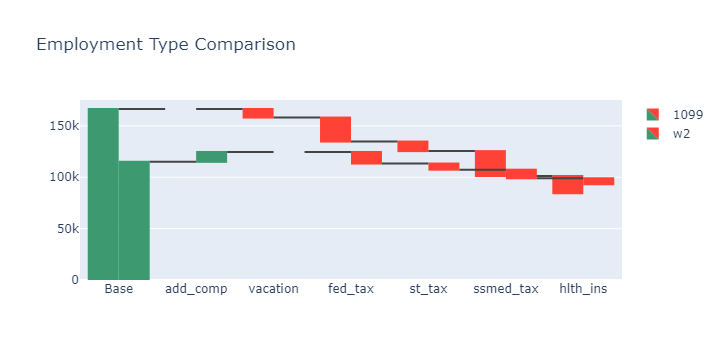

In [18]:
fig

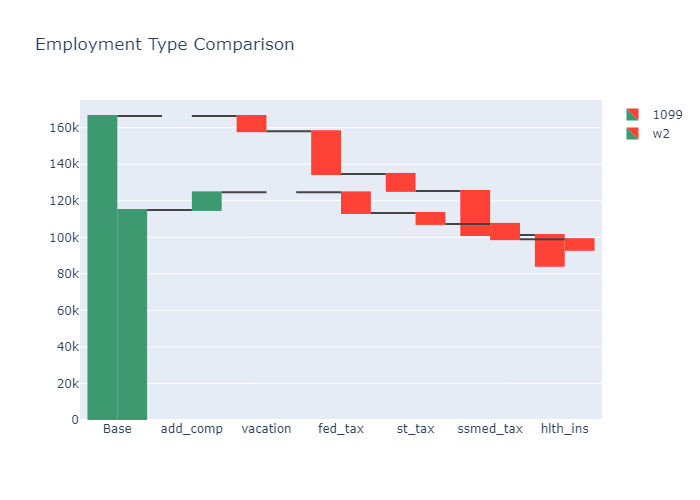